In [1]:
import glob,os
import numpy as np
import pandas as pd
import re

# import astropy
import GCRCatalogs as gcr
from astropy.table import Table, setdiff, vstack, join

import matplotlib.pyplot as plt
plt.style.use('MNRAS.mplstyle')

h = 0.71
file_path = r"/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/"
filepath = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Notebooks/skysim5000/Depth/calc-richness/DepthData/'
filepath1 = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Notebooks/skysim5000/Depth/calc-richness/DepthData/color_cut=9/'
filepath2 = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Notebooks/skysim5000/Depth/calc-richness/DepthData/color_cut=100/'

# Load the cylinder richness data of the different depths

In [2]:
def load_and_process_data(file_path, depth):
    filename = f"RichnessDepth-Data/RichnessDepth_{depth}_035_05.dat"
    data_unsorted = Table.read(file_path + filename, format='ascii')
    
    data_sorted = Table(np.sort(data_unsorted, order='lam'))[::-1]
    print(f'D{depth}' ,len(data_sorted), len(np.unique(data_sorted['pixelid'])))
    
    return data_sorted

# Load and process richness data for different depths
# cluster_001_20 = load_and_process_data(filepath, 0.01)
# cluster_01_20 = load_and_process_data(filepath, 0.1)  # color-cut=20, Depth=0.1
# cluster_05_20 = load_and_process_data(filepath, 0.5)  # color-cut=20, Depth=0.5
# cluster_05_9 = load_and_process_data(filepath1, 0.5)  # color-cut=9, Depth=0.5
# cluster_1_100 = load_and_process_data(filepath2, 1)    # color-cut=100, Depth=1
cluster_1 = load_and_process_data(filepath, 1)
cluster_30 = load_and_process_data(filepath, 30)
cluster_60 = load_and_process_data(filepath, 60)
cluster_90 = load_and_process_data(filepath, 90)
cluster_120 = load_and_process_data(filepath, 120)

D1 270807 1568
D30 276635 1568
D60 273697 1568
D90 271582 1568
D120 269707 1568


# Load Halos data with Weak lensing profiles

In [3]:
## Sigma and DS profile
sigma_ds_profile = pd.read_pickle(file_path + 'WL-Signal/skysim-full-2152757-1.1.1.csv')
print(len(sigma_ds_profile))
sigma_ds_profile = sigma_ds_profile[sigma_ds_profile['baseDC2/sod_halo_mass']>0]
print(len(sigma_ds_profile))
sigma_ds_profile[:3]

2152757
2149934


,halo_id,radius,sigma,DS,baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_mass,pixel_id
0,21510052411,"[0.11625478705692514, 0.21482457658477289, 0.3...","[78612834141880.81, 14933447677748.465, 784974...","[23464216793084.758, 45369716100550.74, 223461...",4.926635e+12,0.310727,0.203337,-40.131041,0.996726,8.223615e+12,11.097545,1.158256e+13,10052
1,27910052411,"[0.12314233583981647, 0.1946385019593716, 0.33...","[69137409498569.67, 18537356311081.613, -83061...","[20005037864612.92, 36060834738498.14, 1456097...",7.011123e+12,0.349626,0.207353,-40.455208,0.998997,8.035107e+12,10.412447,1.131705e+13,10052
2,33810052411,"[nan, 0.20168449252984735, 0.3338147296733549,...","[nan, 33861894111106.793, -5767578407861.902, ...","[nan, 25678358976517.617, 11424558927322.535, ...",8.982885e+12,0.379466,0.204473,-39.923554,0.997372,1.059793e+13,11.115452,1.492666e+13,10052


# Load cluster-halos matched (RedMaPPer)

In [4]:
cluster_halos_red = pd.read_pickle(file_path + 'halos/halos_redmapper_mthd2.csv')
cluster_halos_red = pd.merge(cluster_halos_red,sigma_ds_profile, on='halo_id', how='left')
print(len(cluster_halos_red))
cluster_halos_red = cluster_halos_red[(cluster_halos_red['redshift_y']>=0.35) & (cluster_halos_red['redshift_y']<0.5)]
cluster_halos_red = cluster_halos_red.sort_values(by='richness',ascending=False)
print(len(cluster_halos_red))
cluster_halos_red[:3]

37798
7791


,cluster_id,richness,dec_x,redshift_1,clusters/z_lambda,clusters/mem_match_id,ra_x,halo_id,baseDC2/sod_halo_mass_x,halo_mass_x,...,DS_y,baseDC2/sod_halo_mass_y,baseDC2/sod_halo_radius_y,redshift_y,dec_y,magnification,hostHaloMass,ra_y,halo_mass_y,pixel_id_y
12449,8,283.304352,-48.635477,0.408346,0.408346,8,36.647026,387810675347,9.464646e+14,1.659895e+15,...,"[-203831401336934.6, -185391897236044.72, -249...",9.464646e+14,1.971059,0.405861,-48.635477,0.994772,1.178525e+15,36.647026,1.659895e+15,10675
1667,25,269.696899,-39.456496,0.421540,0.421540,25,30.952695,49010059347,7.557875e+14,1.111478e+15,...,"[214603429403358.06, 110408702058729.98, 15817...",7.557875e+14,1.828652,0.420646,-39.456496,1.007037,7.891492e+14,30.952695,1.111478e+15,10059
6886,21,261.199890,-49.252437,0.481522,0.481522,21,60.397077,205510794331,6.594539e+14,1.036123e+15,...,"[-157677921885052.1, -200797890252247.88, -426...",6.594539e+14,1.788555,0.486781,-49.252437,0.991147,7.356470e+14,60.397077,1.036123e+15,10794


# Merge halos with clusters @ 30

In [7]:
# List of cluster tables and suffix values
# cluster_001_20 = cluster_001_20.to_pandas()
# cluster_01_20 = cluster_01_20.to_pandas() # color-cut=20, Depth=0.1
# cluster_05_20 =  cluster_05_20.to_pandas() # color-cut=20, Depth=0.5
# cluster_05_9 =  cluster_05_9.to_pandas() # color-cut=9, Depth=0.5
# cluster_1_100 = cluster_1_100.to_pandas()

cluster_1 = cluster_1.to_pandas()
cluster_30 = cluster_30.to_pandas()
cluster_60 = cluster_60.to_pandas()
cluster_90 = cluster_90.to_pandas()
cluster_120 = cluster_120.to_pandas()

cluster_tables = [ cluster_1,cluster_30, cluster_60, cluster_90, cluster_120]
suffix_values = [ 1, 30, 60, 90, 120]
# cluster_tables = [cluster_001_20,cluster_01_20, cluster_05_20, cluster_05_9, cluster_1_100, cluster_1]#, cluster_30, cluster_60, cluster_90, cluster_120
# suffix_values = ['0.01-20','0.1-20', '0.5-20', '0.5-9', '1-100', '1']

# Dictionary to store the halo tables dynamically
halo_cluster_tables = {}

# Iterate over the tables and suffix values
for i, (cluster_table, suffix) in enumerate(zip(cluster_tables, suffix_values), 1):
    halo_table_name = f"cluster_halo_{suffix}"

    # Perform the join and other operations
    halo_table = pd.merge(sigma_ds_profile,cluster_table, left_on='halo_id',right_on='haloid', how='inner').sort_values(by='lam', ascending=False)
    halo_cluster_tables[halo_table_name] = halo_table
    print(f"Length of {halo_table_name}: {len(halo_table)}")

# cluster_halo_001_20 = halo_cluster_tables['cluster_halo_0.01-20']
# cluster_halo_01_20 = halo_cluster_tables['cluster_halo_0.1-20']
# cluster_halo_05_20 = halo_cluster_tables['cluster_halo_0.5-20']
# cluster_halo_05_9 = halo_cluster_tables['cluster_halo_0.5-9']
# cluster_halo_1_100 = halo_cluster_tables['cluster_halo_1-100']


# cluster_halo_1 = halo_cluster_tables['cluster_halo_1']  # Color-Cut=20
cluster_halo_30 = halo_cluster_tables['cluster_halo_30']  # Color-Cut=20
cluster_halo_60 = halo_cluster_tables['cluster_halo_60']  # Color-Cut=20
cluster_halo_90 = halo_cluster_tables['cluster_halo_90']  # Color-Cut=20 
cluster_halo_120 = halo_cluster_tables['cluster_halo_120']  # Color-Cut=20

Length of cluster_halo_1: 270807
Length of cluster_halo_30: 276635
Length of cluster_halo_60: 273697
Length of cluster_halo_90: 271582
Length of cluster_halo_120: 269707


In [8]:
# plt.scatter(np.log10(cluster_halo_1_100['baseDC2/sod_halo_mass']), cluster_halo_1_100['lam'], s=2, alpha=0.6)
# # plt.scatter(np.log10(cluster_halo_05_20['baseDC2/sod_halo_mass']), cluster_halo_05_20['lam'], s=1, marker='+', alpha=0.6)
# plt.xlabel(r'M  [$\rm M_\odot$]')
# plt.ylabel(r'$\lambda$')
# plt.yscale('log')
# plt.show()

In [9]:
# # cluster_1 = cluster_1.to_pandas()
# cluster_30 = cluster_30.to_pandas()
# cluster_60 = cluster_60.to_pandas()
# cluster_90 = cluster_90.to_pandas()
# cluster_120 = cluster_120.to_pandas()

# # cluster_halo_1 = pd.merge(sigma_ds_profile,cluster_1, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_30 = pd.merge(sigma_ds_profile,cluster_30, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# # cluster_halo_30 = cluster_halo_30[cluster_halo_30['baseDC2/sod_halo_mass']>=1e13]
# cluster_halo_60 = pd.merge(sigma_ds_profile,cluster_60, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# # cluster_halo_60 = cluster_halo_60[cluster_halo_60['baseDC2/sod_halo_mass']>=1e13]
# cluster_halo_90 = pd.merge(sigma_ds_profile,cluster_90, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# # cluster_halo_90 = cluster_halo_90[cluster_halo_90['baseDC2/sod_halo_mass']>=1e13]
# cluster_halo_120 = pd.merge(sigma_ds_profile,cluster_120, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# # cluster_halo_120 = cluster_halo_120[cluster_halo_120['baseDC2/sod_halo_mass']>=1e13]
# print(len(cluster_halo_30),len(cluster_halo_60),len(cluster_halo_90),len(cluster_halo_120))

In [10]:
lamranges = [(20,30), (30,45), (45,60), (60,500)]
lamlabels = ['(20,30]', '(30,45]', '(45,60]', '(60,500]']
cluster_halos_red['lambda_range'] = pd.cut(cluster_halos_red['richness'], bins=[r[0] for r in lamranges] + [lamranges[-1][-1]], labels=lamlabels)

grouped_cl_halos_red = cluster_halos_red.groupby(['lambda_range'])

In [11]:
## Weighted Profile
def stacked_profile_weighted_by_mass_redshift(lnM_select, z_select, prof_select, lnM_all, z_all, profile_A, dm=0.1, dz=0.05):
    #### set up the bins for mass and redshift  (sigma_select/profile_select, sigma_all/profile_all)
    min_m = min(lnM_select)#-dm
    max_m = max(lnM_select)#+dm
    min_z = min(z_select)#-dz
    max_z = max(z_select)#+dz

    # print('z', min_z, max_z)
    m_bins = np.arange(min_m, max_m+dm, dm)
    z_bins = np.arange(min_z, max_z+dz, dz)
    nM = len(m_bins)-1
    nz = len(z_bins)-1
    # print('nM, nz', nM, nz)

    profile_select = np.array([i.tolist() for i in prof_select])
    profile_all = np.array([i.tolist() for i in profile_A])

    nr = np.shape(profile_select)[1]#rbp.nbins_phys_mpc...1
    profile_weighted = np.zeros(nr)
    weight_norm = 0


    pdf1_list = np.zeros([nz, nM]) # see how many bins are too narrow
    pdf2_list = np.zeros([nz, nM]) # see how many bins are too narrow

    for iz in range(nz):
        z_lo = z_bins[iz]
        z_hi = z_bins[iz+1]
        # print(z_lo,z_hi)
        for iM in range(nM):
            m_lo = m_bins[iM]
            m_hi = m_bins[iM+1]
            # print(m_lo, m_hi)
            
            select_bin = (lnM_select >= m_lo)&(lnM_select < m_hi)&(z_select>=z_lo)&(z_select<z_hi)
            weight = len(lnM_select[select_bin]) * 1.
            # print(weight, len(lnM_select[select_bin]),lnM_select[select_bin])
            weight_norm += weight
            # print(weight_norm)
            select_all = (lnM_all >= m_lo)&(lnM_all < m_hi)&(z_all>=z_lo)&(z_all<z_hi)

            pdf1_list[iz, iM] = weight
            # print(pdf1_list)
            pdf2_list[iz, iM] = len(lnM_all[select_all])
            # print(pdf2_list)

            if weight > 0 and len(lnM_all[select_all]) > 0:
                # print(weight, len(lnM_all[select_all]))
                # if weight == len(lnM_all[select_all]):
                    # print('bin is too narrow!')
                profile_weighted += (np.mean(profile_all[select_all, :], axis=0)*weight) #0
                #profile_weighted += np.nan_to_num(np.mean(profile_all[select_all, :], axis=0)*weight)
            #profile_weighted = np.nan_to_num(profile_weighted)
    profile_weighted /= weight_norm

    pdf1_list = np.concatenate(pdf1_list)
    pdf2_list = np.concatenate(pdf2_list)
    diff_list = pdf2_list - pdf1_list
    # print('pdf1==pdf2', len(diff_list[diff_list == 0]), 'out of', len(diff_list))

    return profile_weighted

In [12]:
cluster_halos_red.columns

Index(['cluster_id', 'richness', 'dec_x', 'redshift_1', 'clusters/z_lambda',
       'clusters/mem_match_id', 'ra_x', 'halo_id', 'baseDC2/sod_halo_mass_x',
       'halo_mass_x', 'redshift_x', 'baseDC2/sod_halo_radius_x', 'pixel_id_x',
       'radius_x', 'sigma_x', 'DS_x', 'radius_y', 'sigma_y', 'DS_y',
       'baseDC2/sod_halo_mass_y', 'baseDC2/sod_halo_radius_y', 'redshift_y',
       'dec_y', 'magnification', 'hostHaloMass', 'ra_y', 'halo_mass_y',
       'pixel_id_y', 'lambda_range'],
      dtype='object')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


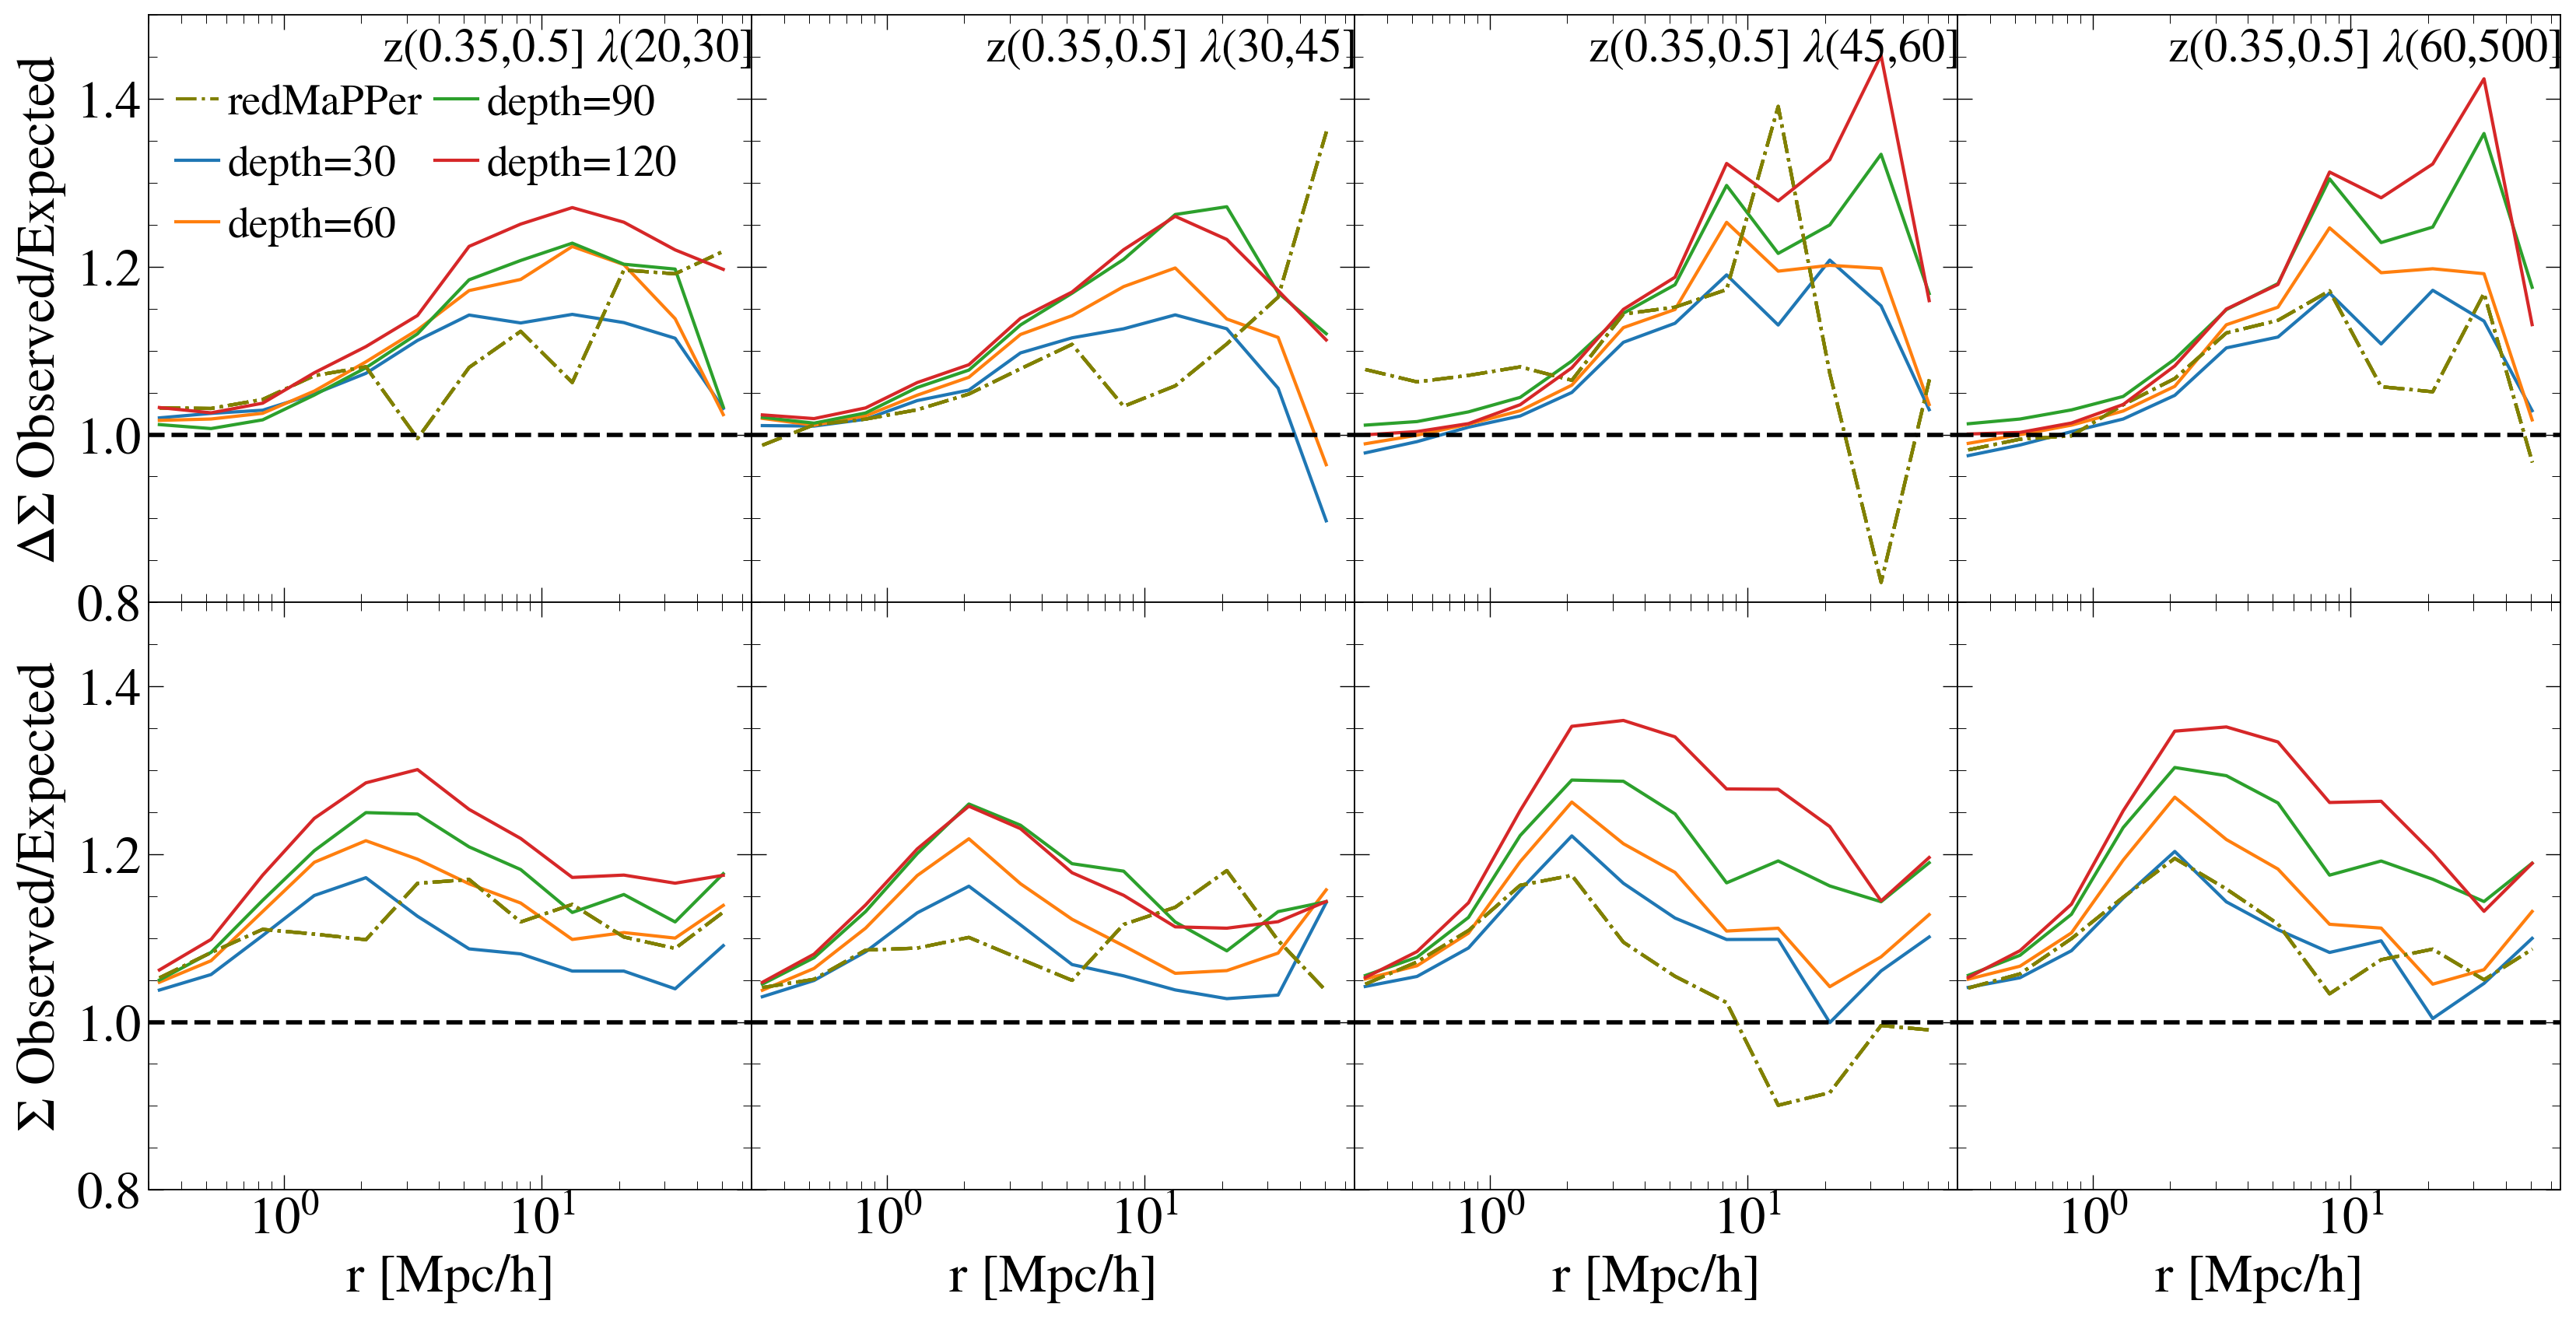

In [22]:
underlying_halos = sigma_ds_profile[(sigma_ds_profile['redshift'] >= 0.35) & (sigma_ds_profile['redshift'] < 0.5)]
lnM_All = np.log10(underlying_halos['baseDC2/sod_halo_mass'])
z_All = underlying_halos['redshift']
profile_All = underlying_halos['sigma']
profile_All_ds = underlying_halos['DS']

# Function to select clusters based on lambda values and calculate ratios
def select_and_calculate_ratios(cluster_halo, num_clusters_in_bin, lnM_All, z_All, profile_All_ds, profile_All):
    sel_clusters = cluster_halo.nlargest(num_clusters_in_bin, 'lam')
    cluster_halo = cluster_halo.drop(sel_clusters.index)
    lnM_sel = np.log10(sel_clusters['baseDC2/sod_halo_mass'])
    z_sel = sel_clusters['redshift_y']
    profile_sel = sel_clusters['sigma']
    profile_sel_ds = sel_clusters['DS']

    expected_ds = stacked_profile_weighted_by_mass_redshift(lnM_sel, z_sel, profile_sel_ds, lnM_All, z_All, profile_All_ds)
    expected_sigma = stacked_profile_weighted_by_mass_redshift(lnM_sel, z_sel, profile_sel, lnM_All, z_All, profile_All)

    ratio_ds = np.array(profile_sel_ds.mean(axis=0)) / np.array(expected_ds)
    ratio_sigma = np.array(profile_sel.mean(axis=0)) / np.array(expected_sigma)
    radius = sel_clusters['radius'].mean()
    return radius, ratio_ds, ratio_sigma

# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
D = [30, 60, 90, 120] #'0.1-20','0.5-20', '1-100' #1, 30, 60, 90, 120 '0.01-20','0.1-20','0.5-20', '1-100',


for lambda_group in sorted(grouped_cl_halos_red.groups.keys(), reverse=True):
    sel_clusters_red = grouped_cl_halos_red.get_group(lambda_group)
    lnM_sel_red = np.log10(sel_clusters_red['baseDC2/sod_halo_mass_y'])
    z_sel_red = sel_clusters_red['redshift_y']
    profile_sel_red = sel_clusters_red['sigma_y']
    profile_sel_ds_red = sel_clusters_red['DS_y']
    
    
    num_clusters_in_bin = len(sel_clusters_red)
    
    expected_ds_red = stacked_profile_weighted_by_mass_redshift(lnM_sel_red, z_sel_red, profile_sel_ds_red, lnM_All, z_All, profile_All_ds)
    expected_sigma_red = stacked_profile_weighted_by_mass_redshift(lnM_sel_red, z_sel_red, profile_sel_red, lnM_All, z_All, profile_All)

    ratio_ds_red = np.array(profile_sel_ds_red.mean(axis=0)) / np.array(expected_ds_red)
    ratio_sigma_red = np.array(profile_sel_red.mean(axis=0)) / np.array(expected_sigma_red)
    
    lambda_value = float(re.findall(r'\d+', lambda_group)[0])
    
    # Iterate over different cluster_halo datasets
    #cluster_halo_001_20,cluster_halo_01_20,cluster_halo_05_20,cluster_halo_05_9, cluster_halo_1_100,cluster_halo_1
    for i, cluster_halo in enumerate([cluster_halo_30,cluster_halo_60, cluster_halo_90, cluster_halo_120]): #cluster_halo_05,cluster_halo_1,cluster_halo_30,cluster_halo_60, cluster_halo_90, cluster_halo_120
        radius, ratio_ds, ratio_sigma = select_and_calculate_ratios(cluster_halo, num_clusters_in_bin, lnM_All, z_All, profile_All_ds, profile_All)

        # Plotting
        col_index = int(lambda_value) // 15 - 1

        axes[0, col_index].plot(sel_clusters_red['radius_y'].mean(), ratio_ds_red, label='redMaPPer' if i == 0 else None, linestyle='dashdot',color='olive')
        axes[0, col_index].plot(radius, ratio_ds, label=f'depth={D[i]}')
        axes[0, col_index].grid(visible=False)
        # axes[0, col_index].set_ylim([0.5, 2])
        
        axes[1, col_index].plot(sel_clusters_red['radius_y'].mean(), ratio_sigma_red, linestyle='dashdot',color='olive')
        axes[1, col_index].plot(radius, ratio_sigma)
        axes[1, col_index].set_ylim([0.8, 1.5])
        axes[1, col_index].grid(visible=False)
                                    
    # Set plot properties
    for row_index, ax_row in enumerate(axes):
        ax_row[col_index].set_xscale('log')
        ax_row[col_index].set_ylabel('$\Delta\Sigma$ Observed/Expected' if row_index == 0 else '$\Sigma$ Observed/Expected', fontsize=25)
        ax_row[0].legend(loc='lower left', frameon=False, ncol=2, fontsize=20, bbox_to_anchor=(-0.02, 0.54),
                        handletextpad=0.2, 
                        columnspacing=0.3,
                        markerscale=0.8,  # Scale down the size of the markers
                        handlelength=1)
    # Set the title inside the subplot
    title = f'z(0.35,0.5] $\lambda${lambda_group}'
    title_y = 1.1 if row_index > 3 else 0.9  # Adjust the y position for the last row
    axes[0,col_index].set_title(title,  loc='right', y=title_y)


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0, wspace=0)

for ax in axes.flat:
    ax.label_outer()
    ax.tick_params(axis='both', labelsize=24)
    ax.axhline(y=1, color='black', linestyle='--', linewidth=2)

# Set the x and y-axis labels for the bottom subplots
for ax in axes[-1, :]:
    ax.set_xlabel('r [Mpc/h]', fontsize=25)

for ax in axes[1, :]:
    ax.set_xlim(0.3, None)

filep = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/'
plt.savefig(filep + 'Images/skysim_depth_bias.png', facecolor='white')
plt.show()


# Load redmapper clusters

In [34]:
redmapper = gcr.load_catalog('skysim5000_v1.1.1_redmapper_v0.8.5')
redmapper_cl = Table(redmapper.get_quantities(['cluster_id','ra','dec','redshift','richness','clusters/z_lambda','clusters/mem_match_id'])) #46491
# redmapper_me = Table(redmapper.get_quantities(['cluster_id_member','dec_member','ra_member','p_member'])) #2381320
print(len(redmapper_cl))

46491


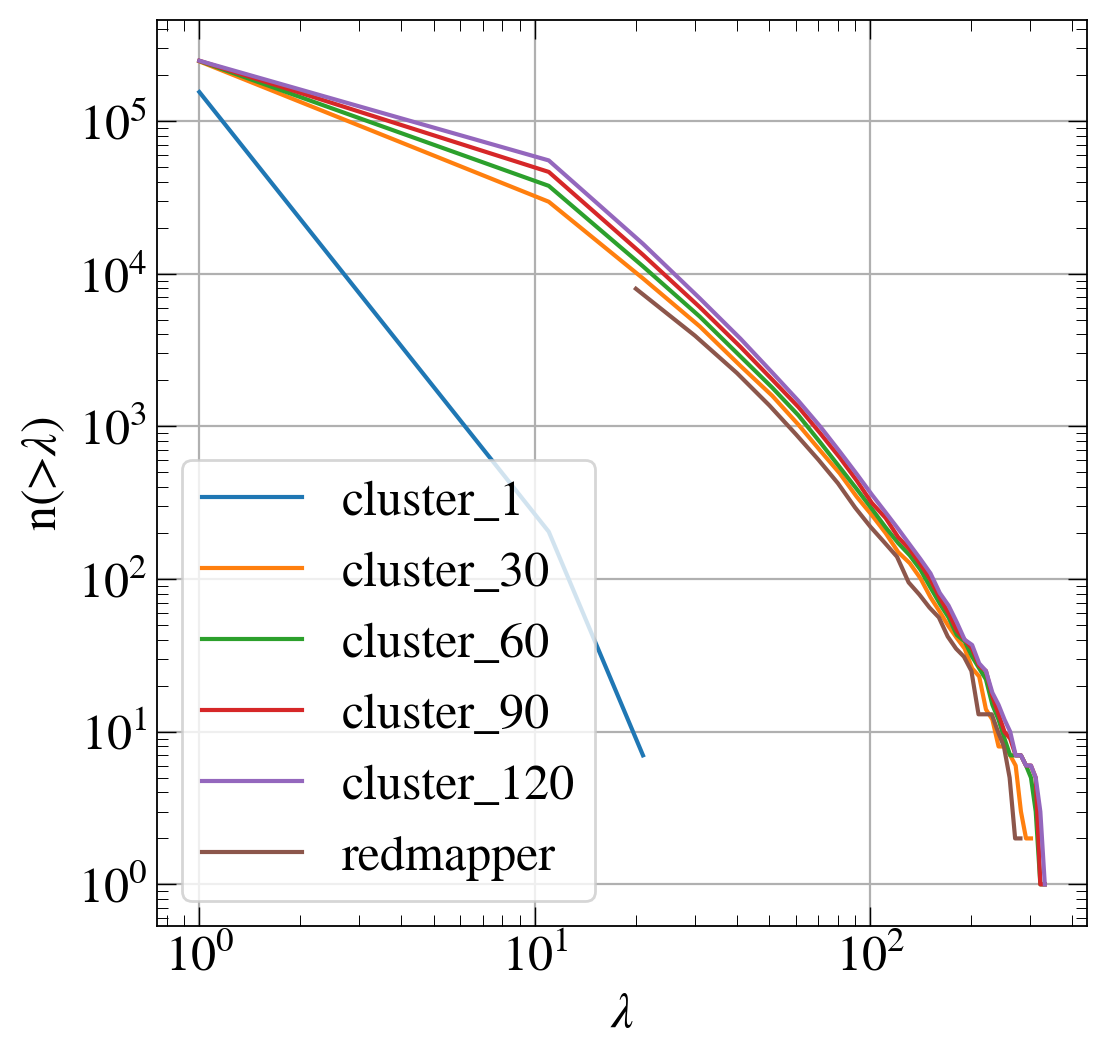

In [35]:
redmapper_cl = redmapper_cl[(redmapper_cl['redshift']>=0.35) & (redmapper_cl['redshift']<0.5)]

def n_greater_than_lambda(data):
    for i in range(len(data)):
        lambda_values = np.arange(data[i].min(), data[i].max(), 10)
#         print(lambda_values)
        n_greater_than_lambda = np.zeros(lambda_values.shape)
        for j in range(len(lambda_values)):
            n_greater_than_lambda[j] = np.count_nonzero(data[i] > lambda_values[j]) #/ len(data[i])
#         print(n_greater_than_lambda)
        plt.yscale('log')
        plt.xscale('log')
        plt.plot(lambda_values, n_greater_than_lambda, label=labels[i])

    plt.xlabel('$\lambda$')
    plt.ylabel('n(>$\lambda$)')
#     plt.xlim(20,None)
#     plt.ylim(None,4e3)
    plt.legend()
    plt.show()

# Generate some data
data = [cluster_1['lam'],cluster_30['lam'],cluster_60['lam'],cluster_90['lam'],cluster_120['lam'],redmapper_cl['richness']] #cluster_30['lam'],cluster_60['lam'],cluster_90['lam'],cluster_120['lam'],
labels = ['cluster_1', 'cluster_30','cluster_60','cluster_90','cluster_120','redmapper'] 

n_greater_than_lambda(data)

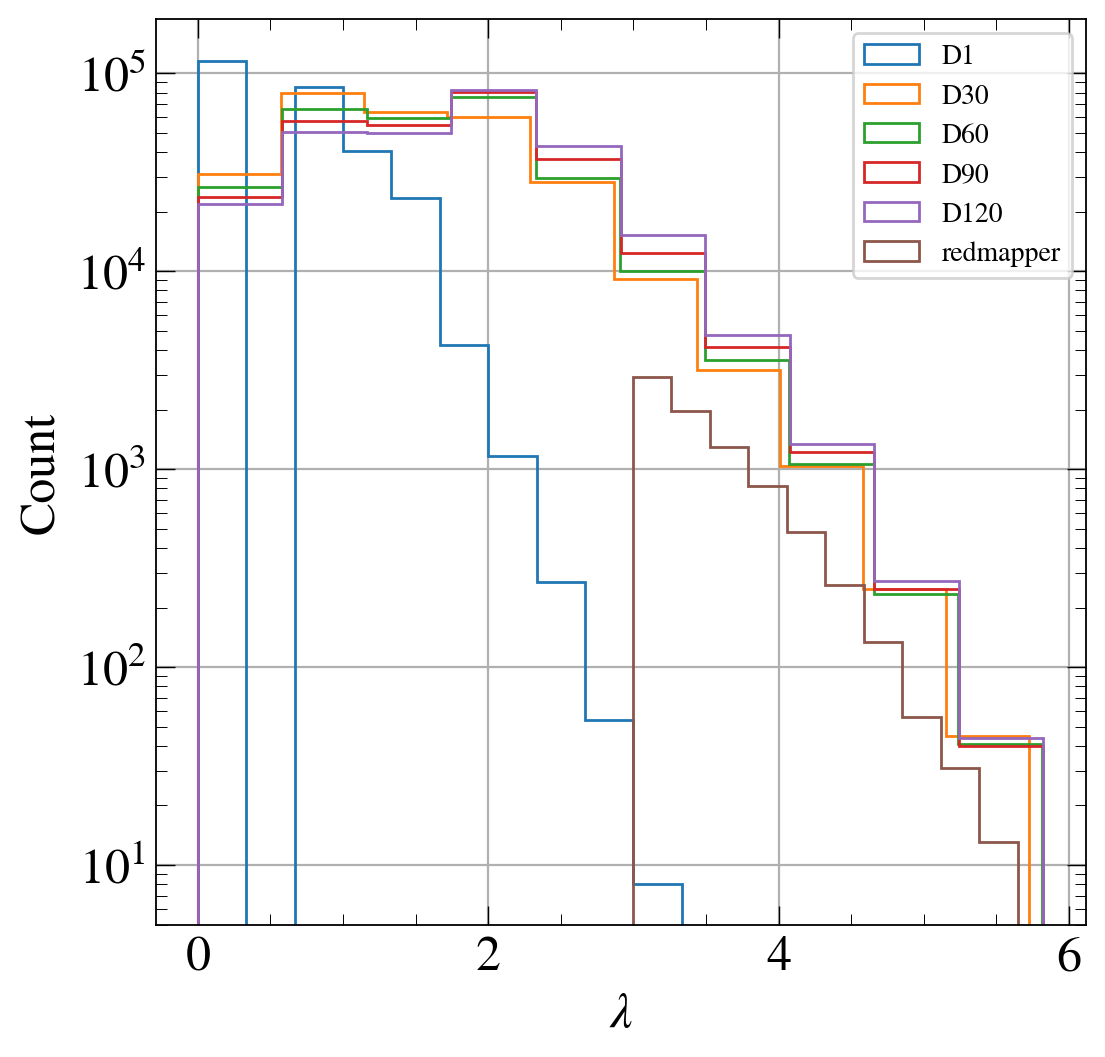

In [36]:
plt.hist(np.log(cluster_1['lam']), label='D1',  histtype='step')
plt.hist(np.log(cluster_30['lam']), label='D30', histtype='step')
plt.hist(np.log(cluster_60['lam']), label='D60', alpha=1, histtype='step')
plt.hist(np.log(cluster_90['lam']), label='D90',  histtype='step')
plt.hist(np.log(cluster_120['lam']), label='D120',  histtype='step')
plt.hist(np.log(redmapper_cl['richness']), label='redmapper',  histtype='step')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$')  # Adjusted to put 'lam' on the x-axis
plt.ylabel('Count')
plt.legend(loc='best',fontsize=10)
plt.show()